In [1]:
import os
# Set the working directory to the directory of the script
os.chdir(r"G:/Mon Drive/Cat's_Software/TRAIL_v2024")

#  <img src="../data/logo_transparent.png" width="70"> 3. Visualize Trails with predictions

In [3]:
import folium
import folium.plugins as plugins
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from datetime import datetime, timedelta

from dep.coureur import Coureur
from dep.trails import Trail
from dep.utils_trails import pred, add_table_to_map

# Loading data

In [4]:
# coureur = 'Jim WALMSLEY'
Pugin = Coureur(nom= 'PUGIN',
                   prenom= 'Jean-Francois',
                   poids=65,
                   conso_eau = 0.5, # l/h
                   conso_glucide = 60, # g/h
                   ) 
# coureur = 'Christian GAVIGNET'
# coureur = 'Jonas RUSSI'

coureur_choisi = Pugin

PIK = f"./data/coureurs/{coureur_choisi.prenom_nom}.dat"
Trails_objects = []
with open(PIK, "rb") as f:
    while True:
        try:
            Trails_objects.append(pickle.load(f))
        except EOFError:
            break

In [5]:
Lst_trails = pd.read_csv(f'./data/coureurs/ListeDesTrails_{coureur_choisi.prenom_nom}.csv',sep=';')
Lst_trails = Lst_trails[~Lst_trails['Trail'].isna()]
Lst_trails

,Trail,Date,Suivi,Heure_depart,Lien_URL,Fichier_parcours_gpx,Vit_plat_km/h,Vit_den+_m/h,Csv_file,Date_dt,Modele_prediction,Fit_intercept,Ralent_sec/km
0,2022TDS,2022-08-23,livetrail,00:00:00,https://livetrail.net/histo/utmb_2022/parcours...,tracedetrail_183308.gpx,15.38,1218.0,2022-08-23_TDS®_147.6km.csv,2022-08-23,points_passages,0.0,11.43
1,2022MaXiRace,2022-05-28,livetrail,02:50:00,https://livetrail.net/histo/maxirace_2022/,tracedetrail_168303.gpx,13.91,2326.0,2022-05-28_MaXi Race_86.6km.csv,2022-05-28,points_passages,0.0,7.84
2,2024UTMB,2023-09-01,A prédire,17:59:00,https://livetrail.net/histo/utmb_2023,utmb-2023.gpx,NaN,NaN,2023-09-01_UTMB®_173.5km.csv,2023-09-01,points_passages,NaN,NaN
3,2024LAVAREDO,2024-06-28,A prédire,23:00:00,https://livetrail.net/histo/lavaredo_2024,lavaredo-ultra-trail-2021-120k.gpx,NaN,NaN,2023-06-23_LAVAREDO 120K_122.2km.csv,2024-06-28,points_passages,NaN,NaN
4,2023WILD,2023-09-15,livetrail,05:01:00,https://livetrail.net/histo/wildstrubel_2023,tracedetrail_224737.gpx,14.65,1763.0,2023-09-15_Wild 110k_113.7km.csv,2023-09-15,points_passages,0.0,12.89
5,ALL,NaN,All,NaN,NaN,NaN,15.45,1446.0,NaN,NaN,points_passages,0.0,12.08
6,PROFIL,NaN,PROFIL,NaN,NaN,NaN,13.01,1713.0,NaN,NaN,points_passages,0.0,5.12


In [6]:
for i,T in enumerate(Trails_objects):
    print(i,T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)

0 2022TDS 2022-08-23 livetrail 00:00:00 2022-08-23_TDS®_147.6km.csv
1 2022MaXiRace 2022-05-28 livetrail 02:50:00 2022-05-28_MaXi Race_86.6km.csv
2 2024UTMB 2023-09-01 A prédire 17:59:00 2023-09-01_UTMB®_173.5km.csv
3 2024LAVAREDO 2024-06-28 A prédire 23:00:00 2023-06-23_LAVAREDO 120K_122.2km.csv
4 2023WILD 2023-09-15 livetrail 05:01:00 2023-09-15_Wild 110k_113.7km.csv
5 ALL NA All NA NA
6 PROFIL NA PROFIL NA NA


In [7]:
Trails_objects[3].df_ppassage.Point_passage.to_list()


["Cortina d'Ampezzo",
 'Ospitale - 120K',
 'Passo Tre Croci - 120K',
 'Federavecchia',
 'Misurina',
 'Rifugio Auronzo',
 'Cimabanche',
 'Malga Ra Stua',
 'Pian de Loa',
 'Malga Travenanzes',
 'Col Gallina',
 'Rifugio Averau',
 'Passo Giau',
 'Mondeval',
 'Rifugio Croda da Lago',
 'Mortisa',
 "Cortina d'Ampezzo"]

In [8]:
# UTMB
liste_ravito_liquide = [
 'Chamonix',
#  'Col de Voza',
 'Saint-Gervais',
 'Les Contamines Montjoie',
 'La Balme',
 'Les Chapieux',
 'Lac Combal',
 'Checrouit - Maison Vieille',
 'Courmayeur - Mountain Sport Center Entrée',
 'Refuge Bertone',
 'Arnouvaz',
 'La Fouly',
 'Champex-Lac',
 'Trient',
 'Vallorcine Entrée',
 'La Flégère',
 'Chamonix',
 ]

# LAVAREDO 120K
liste_ravito_liquide =["Cortina d'Ampezzo",
 'Ospitale - 120K',
 'Passo Tre Croci - 120K',
 #'Federavecchia',
 'Misurina',
 'Rifugio Auronzo',
 'Cimabanche',
 'Malga Ra Stua',
 'Pian de Loa',
 'Malga Travenanzes',
 'Col Gallina',
 #'Rifugio Averau',
 'Passo Giau',
 #'Mondeval',
 'Rifugio Croda da Lago',
 'Mortisa',
 "Cortina d'Ampezzo"]

liste_ravito_solide = ["Cortina d'Ampezzo",
 'Ospitale - 120K',
 'Passo Tre Croci - 120K',
 #'Federavecchia',
 'Misurina',
 #'Rifugio Auronzo',
 'Cimabanche',
 'Malga Ra Stua',
 'Pian de Loa',
 #'Malga Travenanzes',
 'Col Gallina',
 #'Rifugio Averau',
 'Passo Giau',
 #'Mondeval',
 'Rifugio Croda da Lago',
 'Mortisa',
 "Cortina d'Ampezzo"]


# Visualisation des résultats et predictions

In [12]:
def run_visu(i, vit_plat, vit_Dplus, ralentissement, fit_intercept):
    T = Trails_objects[i]
    pred(T=T, i=i, vit_plat=vit_plat, vit_Dplus=vit_Dplus, ralentissement=ralentissement, fit_intercept=fit_intercept,
         conso_eau=coureur_choisi.conso_eau, liste_ravito_liquide=liste_ravito_liquide, 
         conso_glucide=coureur_choisi.conso_glucide, liste_ravito_solide=liste_ravito_solide,
         )

In [13]:
Trail_selection = widgets.Dropdown(
    options=[(Trails_objects[i].nom_id,i) for i in range(len(Trails_objects)-1)],
    value=3,
    description='Trail:',
)
vitesse_plat = widgets.FloatSlider(
    value=Trails_objects[-1].vit_plat,
    min=5,
    max=20,
    step=0.1,
    description='Vitesse plat:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
vitesse_Dplus = widgets.FloatSlider(
    value=Trails_objects[-1].vit_Dplus,
    min=600,
    max=6000,
    step=25,
    description='Vitesse D+:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Ralentissement = widgets.FloatSlider(
    value=Trails_objects[-1].ralentissement,
    min=-20,
    max=20,
    step=0.5,
    description='Ralentissement:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)
# widgets.value
fit_intercept = widgets.BoundedFloatText(
    value=Trails_objects[-1].fit_intercept,
    min=0,
    max=10.0,
    step=0.01,
    description='fit_intercept:',
    disabled=False
)


b_save = widgets.Button(description="Save Prediction")

ui = widgets.HBox([Trail_selection,b_save])
ui2 = widgets.HBox([vitesse_plat,vitesse_Dplus,Ralentissement,fit_intercept])
res= widgets.interactive_output(run_visu,{'i':Trail_selection,'vit_plat':vitesse_plat,'vit_Dplus':vitesse_Dplus,'ralentissement':Ralentissement, 
                                          'fit_intercept':fit_intercept })
out = widgets.HBox([res])

# display(ui,out)
display(ui, ui2, res)

def on_button1_clicked(b):
    with res:
        # output.clear_output()
        add_table_to_map(Trail_selection.value,vitesse_plat.value,vitesse_Dplus.value,Ralentissement.value, fit_intercept.value)
b_save.on_click(on_button1_clicked)

Output()

In [64]:
Trails_objects[3].pred_temps(15.45,1446,12.08,0,13, 0)

,id,Point_passage,Altitude_m,Cumul_Dist_km,Delta_Dist_km,Cumul_D+_m,Delta_D+_m,lon,lat,Heure_Passage,...,Delta_reel_h,H_reel_h_init,Delta_reel_h_init,Trail,Pred_Cum_T_Rom,Pred_T_Rom,Heure_predite,DELTA,Ravito_liquide,Ravito_solide
0,0,Cortina d'Ampezzo,1212,0.0,0.0,0,0,12.13700,46.53745,Fri. 23:00,...,0.000000,0.000000,0.000000,2024LAVAREDO,0.00,0.00,Fri. 23:00,0.00,1,1
1,2,Ospitale - 120K,1483,18.8,18.8,823,823,12.14235,46.60251,Sat. 00:32,...,1.545000,1.545000,1.545000,2024LAVAREDO,1.85,1.85,Sat. 00:51,0.31,1,1
2,4,Passo Tre Croci - 120K,1797,28.1,9.3,1480,657,12.20110,46.55695,Sat. 01:31,...,0.985000,2.530000,0.985000,2024LAVAREDO,3.00,1.15,Sat. 02:00,0.47,1,1
3,6,Federavecchia,1385,34.1,6.0,1546,66,12.24854,46.54687,Sat. 01:58,...,0.451389,2.981389,0.451389,2024LAVAREDO,3.55,0.55,Sat. 02:33,0.57,0,0
4,8,Misurina,1761,42.7,8.6,2113,567,12.25325,46.57797,Sat. 02:56,...,0.960000,3.941389,0.960000,2024LAVAREDO,4.64,1.09,Sat. 03:38,0.70,1,1
5,10,Rifugio Auronzo,2312,49.9,7.2,2707,594,12.29643,46.61231,Sat. 03:48,...,0.865000,4.806389,0.865000,2024LAVAREDO,5.68,1.04,Sat. 04:40,0.87,1,0
6,17,Cimabanche,1532,67.6,17.7,2988,281,12.18375,46.62006,Sat. 05:17,...,1.485000,6.291389,1.485000,2024LAVAREDO,7.25,1.57,Sat. 06:15,0.96,1,1
7,18,Malga Ra Stua,1705,77.2,9.6,3520,532,12.09890,46.62530,Sat. 06:17,...,0.997778,7.289167,0.997778,2024LAVAREDO,8.50,1.25,Sat. 07:30,1.21,1,1
8,20,Pian de Loa,1380,81.8,4.6,3596,76,12.09950,46.60022,Sat. 06:42,...,0.423056,7.712222,0.423056,2024LAVAREDO,9.12,0.62,Sat. 08:07,1.41,1,1
9,22,Malga Travenanzes,1986,90.6,8.8,4307,711,12.04140,46.55242,Sat. 07:43,...,1.006944,8.719167,1.006944,2024LAVAREDO,10.49,1.37,Sat. 09:29,1.77,1,0


In [33]:
Trails_objects[2].df_ppassage['Point_passage'].to_list()

['Chamonix',
 'Col de Voza',
 'Saint-Gervais',
 'Les Contamines Montjoie',
 'La Balme',
 'Refuge de la Croix du Bonhomme',
 'Les Chapieux',
 'Col de la Seigne',
 'Lac Combal',
 'Arête du Mont-Favre',
 'Checrouit - Maison Vieille',
 'Courmayeur - Mountain Sport Center Entrée',
 'Courmayeur - Mountain Sport Center Sortie',
 'Refuge Bertone',
 'Refuge Bonatti',
 'Arnouvaz',
 'Grand Col Ferret',
 'La Fouly',
 'Champex-Lac',
 'La Giète',
 'Trient',
 'Les Tseppes',
 'Vallorcine Entrée',
 'Vallorcine Sortie',
 'La Flégère',
 'Chamonix']

In [101]:
df = 
df

,Point_passage,Cumul_Dist_km,Pred_Cum_T_Rom,Ravito_liquide,DT,Eau_à_emporter
0,Chamonix,0.0,0.00,1,0.00,1.0
1,Col de Voza,13.1,1.43,1,1.43,0.5
2,Saint-Gervais,21.4,2.14,1,0.71,0.8
3,Les Contamines Montjoie,31.5,3.31,1,1.17,0.8
4,La Balme,40.1,4.40,1,1.09,1.1
5,Les Chapieux,50.8,5.97,1,1.57,1.8
6,Lac Combal,68.6,8.50,1,2.53,1.0
7,Checrouit - Maison Vieille,76.9,9.88,1,1.38,0.4
8,Courmayeur - Mountain Sport Center Entrée,81.8,10.48,1,0.60,1.0
9,Refuge Bertone,87.1,11.94,1,1.46,1.2


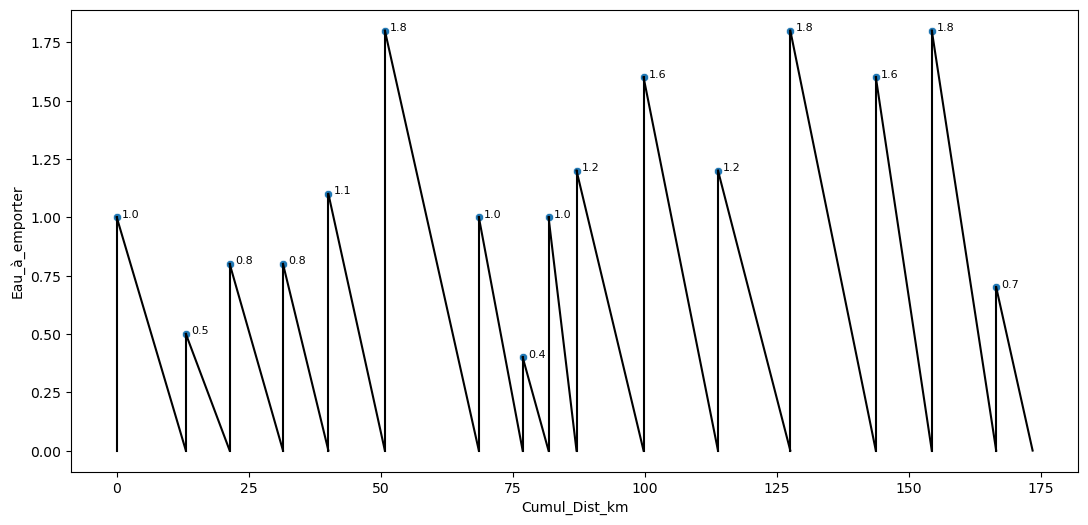

In [ ]:
# def plot_data(i, df,axeX, axeY1, axeY2, df_eau, df_glucide,  vit_plat,vit_Dplus,ralentissement, fit_intercept):

#     fig, ax = plt.subplots(4,1, figsize=(15,12))

#     sns.lineplot(data=Trails_objects[i].df_parcours, x=axeX, y='Altitude_m', ax=ax[0], color='black')
#     ax[0].fill_between(Trails_objects[i].df_parcours[axeX],Trails_objects[i].df_parcours['Altitude_m'], color="skyblue", alpha=0.4)
#     sns.scatterplot(data=df, x=axeX, y='Altitude_m', ax=ax[0], color='red')
#     # Put labels on scatterplot from df colum 'Point_passage'
#     for j, txt in enumerate(df['Point_passage']):
#         ax[0].annotate(txt, (df[axeX].iloc[j], df['Altitude_m'].iloc[j]), fontsize=8)
#     ax[0].set_xticklabels([])
#     ax[0].set_ylabel('Altitude (m)')
#     ax[0].grid()

#     sns.scatterplot(data=df_eau, x='Cumul_Dist_km', y='Eau_à_emporter', ax=ax[1], color='red')
#     for j in range(len(df_eau)-1):
#         ax[1].plot([df_eau.loc[j,'Cumul_Dist_km'],df_eau.loc[j,'Cumul_Dist_km']],
#                    [0,df_eau.loc[j,'Eau_à_emporter']], color='blue')
#         ax[1].plot([df_eau.loc[j,'Cumul_Dist_km'],df_eau.loc[j+1,'Cumul_Dist_km']],
#                    [df_eau.loc[j,'Eau_à_emporter'],0], color='blue')
#         ax[1].annotate(f"{df_eau.loc[j,'Eau_à_emporter']} lit", (df_eau.loc[j,'Cumul_Dist_km']+1,
#                                                                  df_eau.loc[j,'Eau_à_emporter']), fontsize=11)
#         ax[1].fill_between([df_eau.loc[j,'Cumul_Dist_km'],df_eau.loc[j+1,'Cumul_Dist_km']],
#                            [df_eau.loc[j,'Eau_à_emporter'],0], color="skyblue", alpha=0.4)
#     ax[1].text(0, 0.1, f'Conso. eau:{conso_eau} l/h')
#     ax[1].grid()




#     sns.scatterplot(data=df_glucide, x='Cumul_Dist_km', y='Glucides_à_emporter', ax=ax[2], color='brown')
#     for j in range(len(df_glucide)-1):
#         ax[2].plot([df_glucide.loc[j,'Cumul_Dist_km'],df_glucide.loc[j,'Cumul_Dist_km']],
#                    [0,df_glucide.loc[j,'Glucides_à_emporter']], color='black')
#         ax[2].plot([df_glucide.loc[j,'Cumul_Dist_km'],df_glucide.loc[j+1,'Cumul_Dist_km']],
#                    [df_glucide.loc[j,'Glucides_à_emporter'],0], color='black')
#         ax[2].annotate(f"{int(df_glucide.loc[j,'Glucides_à_emporter'])}g", 
#                        (df_glucide.loc[j,'Cumul_Dist_km']+1,df_glucide.loc[j,'Glucides_à_emporter']), fontsize=11)
#         ax[2].fill_between([df_glucide.loc[j,'Cumul_Dist_km'],df_glucide.loc[j+1,'Cumul_Dist_km']],
#                            [df_glucide.loc[j,'Glucides_à_emporter'],0], color="pink", alpha=0.4)
#     ax[2].text(0, 5, f'Conso. glucides:{conso_glucide} g/h')
#     ax[2].grid()



#     sns.lineplot(data=df, x=axeX, y=axeY1, ax=ax[3], label="Real time", color='blue')
#     sns.lineplot(data=df, x=axeX, y=axeY2, ax=ax[3], label="Predicted time", color='red')
#     sns.scatterplot(data=df, x=axeX, y=axeY2, ax=ax[3], label="Predicted time", color='red')
#     for j in range(len(df)):
#         ax[3].text(df.loc[j,axeX],df.loc[j,axeY2],f'{round(df.loc[j,axeY2],1)}h', color='blue', 
#                    verticalalignment='bottom', horizontalalignment='right', fontsize=10)
#     ax[3].set_ylabel('Cumulated time (s)')
#     ax[3].legend()
#     ax[3].grid()

#     plt.show()



#     fig.savefig(f'{Trails_objects[i].nom_id}_{vit_plat}_{vit_Dplus}_{round(ralentissement,3)}_{fit_intercept}.png')
    
    
    



# def add_table_to_map(i,vit_plat,vit_Dplus,ralentissement, fit_intercept):

#     message_start = f"""
#           <head>
#           <meta http-equiv="Content-Type" content="text/html; charset=latin-1">
#           <title>Trail de {coureur}</title>"""
#     message_style = """
#             <style type="text/css" media="screen">
#                 #customers {
#                 font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
#                 font-size: 14px;
#                 border-collapse: collapse;
#                 width: 100%;
#                 }
#                 #customers td, #customers th {
#                 border: 1px solid #ddd;
#                 padding: 8px;
#                 }
#                 #customers tr:nth-child(even){background-color: #f2f2f2;}
#                 #customers tr:hover {background-color: #ddd;}
#                 #customers th {
#                 padding-top: 12px;
#                 padding-bottom: 12px;
#                 text-align: left;
#                 background-color: #003d77;
#                 color: white;
#                 }
#             </style>
#             </head>
#             <body>
#         """

#     with open(f'{Trails_objects[i].nom_id}.html', 'r') as f:
#             data = f.read()
#     df_p, _, _ = pred(i, vit_plat,vit_Dplus,ralentissement, fit_intercept)
#     titre = f'''
#         <h3 align="center" style="font-size:16px font-family:Arial"><b></b></h3>
#         '''
#     fig = f'<img src="{Trails_objects[i].nom_id}_{vit_plat}_{vit_Dplus}_{round(ralentissement,3)}_{fit_intercept}.png" alt="Trails" width="1000" height="900">'
#     message_body = df_p[['Point_passage', 'Cumul_Dist_km','Cumul_D+_m','Temps_course','H_reel_h',
#                          'Pred_Cum_T_Rom','Heure_Passage','Heure_predite','DELTA']].to_html(index=False, table_id="customers")
#     data = message_start + message_style + titre + data + fig + message_body
#     with open(f'{Trails_objects[i].nom_id}_{vit_plat}_{vit_Dplus}_{round(ralentissement,3)}_{fit_intercept}.html', 'w') as f:
#         f.write(data)


# durée_arret = 0
# à_partir_de = 13

# def pred(i,vit_plat,vit_Dplus,ralentissement, fit_intercept):
#     df_p = Trails_objects[i].pred_temps(vit_plat,vit_Dplus,ralentissement,durée_arret,à_partir_de, fit_intercept)
#     parcours_plot(i, df_p, vit_plat, vit_Dplus, ralentissement, fit_intercept)

#     df_eau, df_glucide =  calc_ravito(i, df_p, conso_eau, liste_ravito_liquide, conso_glucide, liste_ravito_solide)
#     # display(df_eau)

#     plot_data(i, df_p,'Cumul_Dist_km','H_reel_h','Pred_Cum_T_Rom', df_eau, df_glucide, vit_plat,vit_Dplus,ralentissement, fit_intercept)
#     # Convert column format
#     df_p['Delta_Dist_km'] = round(df_p['Delta_Dist_km'],1)
#     df_p['Cumul_D+_m'] = df_p['Cumul_D+_m'].apply(int)
#     df_p['Cumul_Dist_km'] = round(df_p['Cumul_Dist_km'],2)
#     df_p['Pred_Cum_T_Rom'] = round(df_p['Pred_Cum_T_Rom'],2)
#     try:
#         df_p['Heure_Passage'] = df_p['Heure_Passage'].apply(lambda x: pd.to_datetime(x).strftime("%a. %H:%M"))
#     except:
#         pass
#     display(df_p[['Point_passage', 'Cumul_Dist_km','Cumul_D+_m','Temps_course','H_reel_h','Pred_Cum_T_Rom',
#                   'Heure_Passage','Heure_predite','DELTA']])
#     # add_table_to_map(i,vit_plat,vit_Dplus,ralentissement)
#     return df_p, df_eau, df_glucide


# def parcours_plot(i, df_p, vit_plat, vit_Dplus, ralentissement, fit_intercept):
#     Trails_objects[i].plot_parcours(df_p, vit_plat, vit_Dplus, ralentissement, fit_intercept)  


# def calc_ravito(i, df_p, conso_eau, liste_ravito_liquide, conso_glucide, liste_ravito_solide):
    
#     df_p['Ravito_liquide'] = 0
#     df_p['Ravito_solide']=0
#     df_p.loc[df_p['Point_passage'].isin(liste_ravito_liquide), 'Ravito_liquide'] = 1
#     df_p.loc[df_p['Point_passage'].isin(liste_ravito_solide), 'Ravito_solide'] = 1

#     df_eau = df_p.loc[df_p['Ravito_liquide']==1, ['Point_passage', 'Cumul_Dist_km', 'Pred_Cum_T_Rom', 
#                                               'Ravito_liquide']]
#     df_glucide = df_p.loc[df_p['Ravito_solide']==1, ['Point_passage', 'Cumul_Dist_km', 'Pred_Cum_T_Rom', 
#                                               'Ravito_solide']]


#     df_eau.reset_index(drop=True, inplace=True)
#     df_glucide.reset_index(drop=True, inplace=True)
#     df_eau['DT'] = df_eau['Pred_Cum_T_Rom'].diff()
#     df_glucide['DT'] = df_glucide['Pred_Cum_T_Rom'].diff()
#     df_eau['DT'] = df_eau['DT'].fillna(0)
#     df_glucide['DT'] = df_glucide['DT'].fillna(0)

#     for i in range(len(df_eau)-1):
#         df_eau.loc[i,'Eau_à_emporter'] = round(df_eau.loc[i+1,'DT']*conso_eau,1)
#     for i in range(len(df_glucide)-1):  
#         df_glucide.loc[i,'Glucides_à_emporter'] =round(df_glucide.loc[i+1,'DT']*conso_glucide,1)

#     return df_eau, df_glucide


In [ ]:
def calc_delta(df):
    df.loc[0,'distance']=0
    for i in range(len(df)-1):
        df.loc[i+1,'distance'] = distance.distance((df.loc[i,'lat'],df.loc[i,'lon']),(df.loc[i+1,'lat'],df.loc[i+1,'lon'])).meters
        # df.loc[i+1,'dénivelé'] = df.loc[i+1,'alt']-df.loc[i,'alt']
    print(df['distance'].sum())
    return df

In [ ]:
calc_delta(Trails_objects[12].df_parcours)

In [ ]:
Trails_objects[12].df_parcours[:10]

In [ ]:
Lst_trails

In [ ]:
len(Trails_objects)

In [ ]:
fig,ax = plt.subplots(figsize=(16,9))
for i in range(len(Trails_objects)-1):
    vit_plat = 8.8
    vit_Dplus = 950
    ralentissement = 0.005
    df_p = Trails_objects[i].pred_temps(vit_plat,vit_Dplus,ralentissement,durée_arret,à_partir_de)
    ax.plot(Trails_objects[i].df_ppassage['Cumul_Dist_km'],Trails_objects[i].df_ppassage['H_reel_h'])
    # ax.plot(Trails_objects[i].df_ppassage['Cumul_Dist_km'],Trails_objects[i].df_ppassage['Pred_Cum_T_Rom'],c='red',linestyle='--')
    # pred(i,vit_plat,vit_Dplus,ralentissement)
ax.set_xlabel('Cumul_Dist_km')
ax.set_ylabel(f"{'H_reel_h'} {'Pred_Cum_T_Rom'}")
plt.legend([Trails_objects[i].nom_id for i in range(len(Trails_objects))])
plt.grid()

In [ ]:
# Tableau de différentes prédictions
i = 12
Simu = [(8.8, 950, 0.005),
        (9.9, 1100, 0.007),
        (9.9, 1100, 0.006)]
df2 = Trails_objects[i].df_ppassage
for p in Simu:
    print(f"{Trails_objects[i].nom_id} {p[0]}km/h {p[1]}m/h {p[2]}h/km")
    df2 = pred(i,p[0],p[1],p[2])
    df2[f"{Trails_objects[i].nom_id} {p[0]}km/h {p[1]}m/h {p[2]}h/km"]=df2['Heure_predite']

In [ ]:
Trails_objects[12].df_ppassage.columns

In [ ]:
champs = ['Point_passage', 'Delta_Dist_km', 'Cumul_Dist_km', 'Delta_D+_m',
       'Cumul_D+_m','Altitude_m' ] + [f"{Trails_objects[i].nom_id} {p[0]}km/h {p[1]}m/h {p[2]}h/km" for p in Simu] 
champs

In [ ]:
Trails_objects[12].df_ppassage[champs].to_html('Temps_roms_TDS2023.html')

In [ ]:
message_start = f"""
          <head>
          <meta http-equiv="Content-Type" content="text/html; charset=latin-1">
          <title>Prediction Trail Romain Morand</title>"""
message_style = """
          <style type="text/css" media="screen">
            #customers {
              font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
              font-size: 14px;
              border-collapse: collapse;
              width: 100%;
            }
            #customers td, #customers th {
              border: 1px solid #ddd;
              padding: 8px;
            }
            #customers tr:nth-child(even){background-color: #f2f2f2;}
            #customers tr:hover {background-color: #ddd;}
            #customers th {
              padding-top: 12px;
              padding-bottom: 12px;
              text-align: left;
              background-color: #003d77;
              color: white;
            }
          </style>
        </head>
        <body>
        """
titre = f'''
        <h3 align="center" style="font-size:16px font-family:Arial"><b>Prediction Heure de passage {Trails_objects[i].nom_id}</b></h3>
        '''
message_body = Trails_objects[12].df_ppassage[champs].to_html(index=False, table_id="customers") #set table_id to your css style name
message_end = """</body>"""
message = (message_start + message_style + message_body + message_end)
# OUTPUT AN HTML FILE
with open(f'Temps_roms_TDS2023.html', 'w') as f:
        f.write(message)

In [ ]:
Trails_objects[8].df_ppassage[['Point_passage','Cumul_Dist_km','Cumul_D+_m','ALL 6.9 1284 0','UTHG+TRAV 5.8 1275 0','TRAV 5.2 2137 0','UTHG 6 1283 0']]

In [ ]:
Trails_objects[1].df_ppassage.columns.to_list()

In [ ]:
Trails_objects[9].df_ppassage

In [ ]:
Trail_selection1 = widgets.Dropdown(
    options=[(Trails_objects[i].nom_id,i) for i in range(len(Trails_objects))],
    value=9,
    description='Trail1:',
)
Trail_selection2 = widgets.Dropdown(
    options=[(Trails_objects[i].nom_id,i) for i in range(len(Trails_objects))],
    value=9,
    description='Trail2:',
)
axeX = widgets.Dropdown(
    options=Trails_objects[1].df_ppassage.columns.to_list(),
    value='Cumul_Dist_km',
    description='Axe X:',
)
axeY1 = widgets.Dropdown(
    options=Trails_objects[1].df_ppassage.columns.to_list(),
    value='H_reel_h',
    description='Axe Y1:',
)
axeY2 = widgets.Dropdown(
    options=Trails_objects[1].df_ppassage.columns.to_list(),
    value='Pred_Cum_T_Rom',
    description='Axe Y2:',
)
ui1 = widgets.HBox([Trail_selection1,axeY1,axeX])
ui2 = widgets.HBox([Trail_selection2,axeY2])
res= widgets.interactive_output(plot_data,{'i1':Trail_selection1,'i2':Trail_selection2,'axeX':axeX,'axeY1':axeY1,'axeY2':axeY2})

display(ui1,ui2,res)